<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/20_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio de datos EDA
Conjunto de tecnicas estadisticas cuyo objetivo es explorar, describbir y resumir la naturaleza de los datos y comprender la relaciones existentes entre las variables de interes utilizando la comprencion del conjunto de datos.

##pasos del eda
1. **realizar un analisis descriptivo de las variables**
2. **re-ajustar tipo de variable que no sean consistentes en el momento de realizar las operaciones**
3. **detectar y tratar datos ausentes (NaN) que nos permitira procesar adecuadamente variables numericas**
4. **identificar datos atipicos y tratarlos de forma adecuda**. esto mitigara la distorsion de futuos analisis estadisticos
5. **realizar un examen mnumerico y grafico de las relaciones**


PREGUNTA OBJETIVO:

**¿JACK SE SALVABA SI ROSE LE HUBIERA HECHO CAMPITO?**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv ("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Diccionario**
**PassengerId:** numero identidentificación del pasajero

**Survived:** 1 sobrevivio; 0 murio

**Pclass:** Clase de tiquete que tenia el pasajero (1,2,3)

**Name:** Nombre del pasajero

**Sex:** Genero Male/Female

**Age:** Edad

**SibSp:** Numero de Hermanos o esposas en el barco

**Parch:** Numero de padres o hijos

**Ticket:** Id del tiquete

**Fare:** Valor del tiquete

**Cabin:** Numero de la habitación

**Embarked:** Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton




#**1. Analisis descriptivo**

tomar cada una de las caracteristicas y analizarla

In [34]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Fallecidos']
  test.plot(kind="bar",stacked=True,figsize=(10,5))

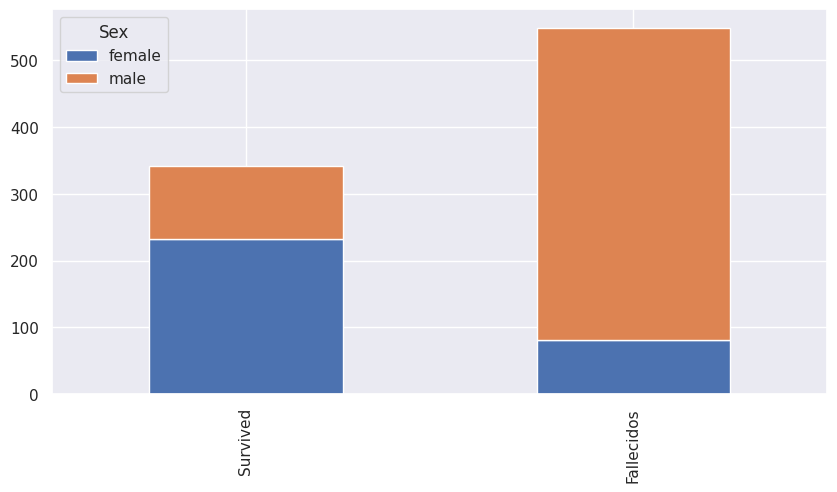

In [35]:
bar_char("Sex")

##**Se observa como las mujeres tuvieron mayor probabilidad de supervivencia**

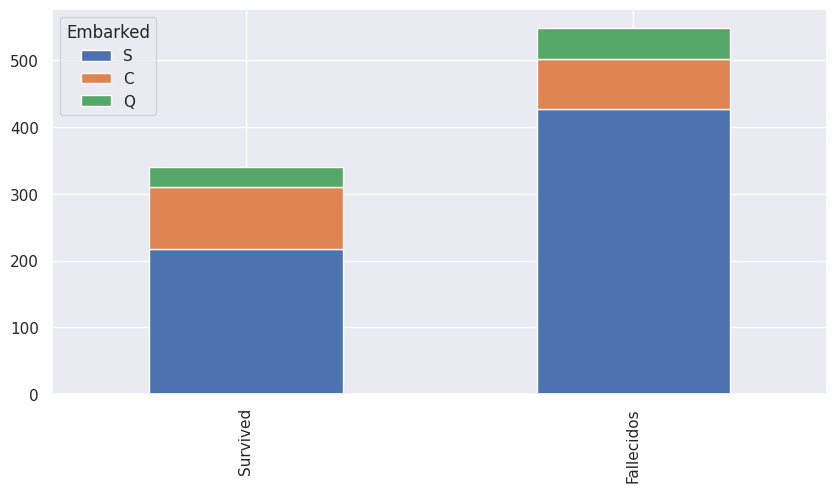

In [36]:
bar_char("Embarked")

##**Se observa como los pasajeros que embarcaron en S tiene una tasa de supervivencia mas baja. Se observa como los pasajeros que embarcaron por Q tienen mayor probabilidad de sobrevivir**

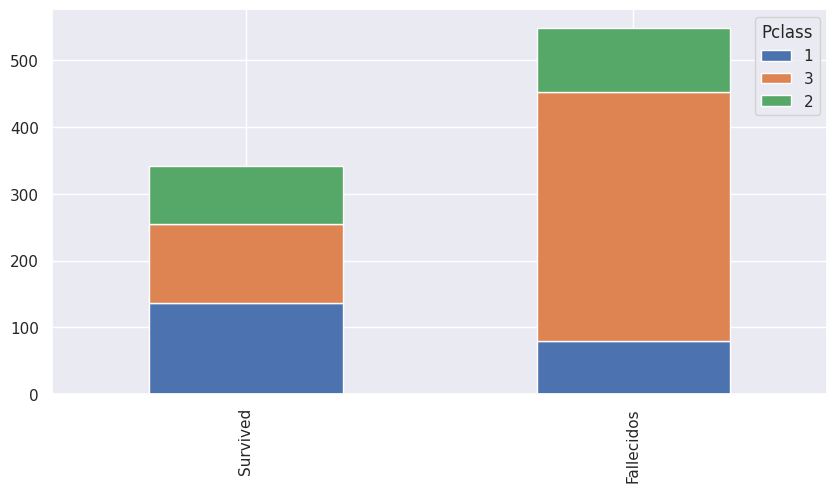

In [37]:
bar_char("Pclass")

##**PClass1 tenian mayor probabilidad de sobrevivir que PClass 3**

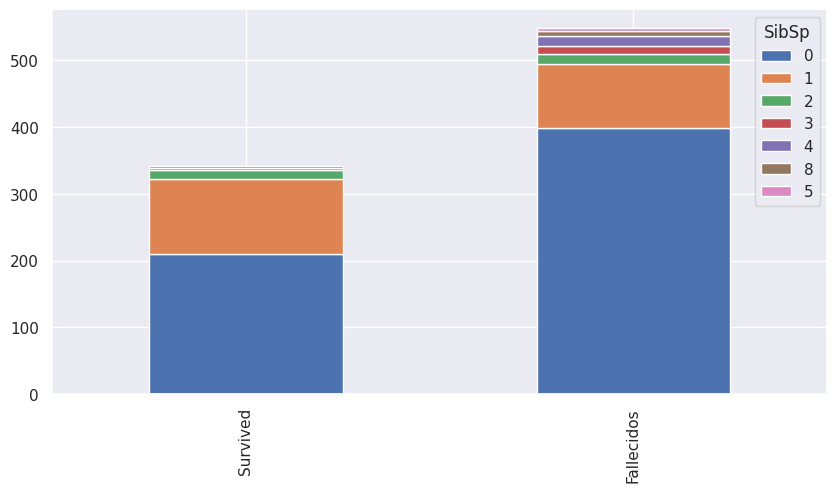

In [9]:
bar_char("SibSp")

##**Se observa como las personas solteras tiene una menor probabilidad de sobrevivir que las que tienen hermanos o esposa**

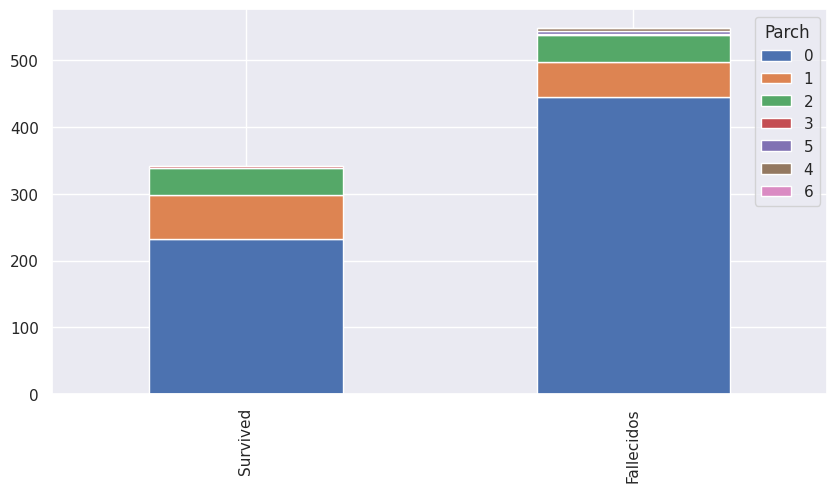

In [ ]:
bar_char("Parch")

##**Se observa como la probabilidad de sobrevivir aumenta si tenia 1 o hasta 3 hijos. Disminuia si tenia 0 o más de 3 hijos**

#**Ingenieria de caracteristicas**
Es el proceso de usar el dominio del conocmiento para crear nuevas caracteristicas (feature vectors) que logre que los algoritmos de machine learning funcionanen adecuadamente

#**2. creando feature vectors**

In [67]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2415557267.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [70]:
df["Title"]=extract_title(df)

In [72]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##**2.1 Creando un mapeo de titulos**

Para ello reemplazamos los titulos con los

**Mr=** 0

**Miss=** 1

**Mrs=** 2

**Otros=** 3

In [73]:
def replace_titles(data):
  title_mapping={"Mr":0,"Miss":1,"Mrs":2}
  data ["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

In [79]:
replace_titles(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,3.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,3.0


In [80]:
df[["Name","title"]].head()

,Name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


#**2.2 reparando la edad**

In [81]:
title_age_means=df.groupby("title")["Age"].mean()
title_age_means

,Age
title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [85]:
df["Age"]=df.apply(lambda row: title_age_means[row["title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

In [87]:
df[["title","Age"]].head(10)

,title,Age
0,Mr,22.00000
1,Mrs,38.00000
2,Miss,26.00000
3,Mrs,35.00000
4,Mr,35.00000
5,Mr,32.36809
6,Mr,54.00000
7,Master,2.00000
8,Mrs,27.00000
9,Mrs,14.00000


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


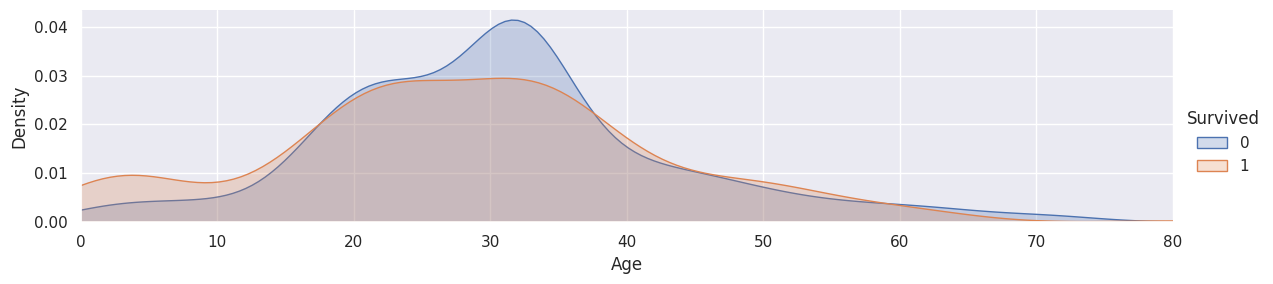

In [89]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


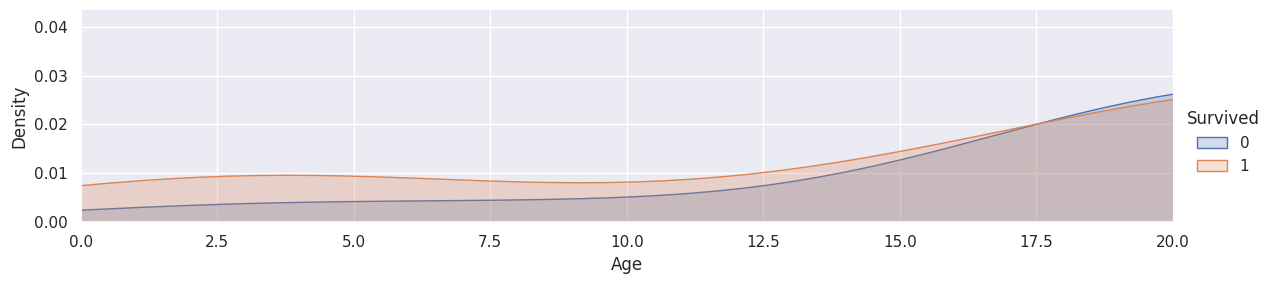

In [90]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()